In [1]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-pressure-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': [
            'fraction_of_cloud_cover', 'specific_cloud_liquid_water_content',
        ],
        'pressure_level': [
            '400', '450', '500',
            '550', '600', '650',
            '700', '750', '775',
            '800', '825', '850',
            '875', '900', '925',
            '950', '975', '1000',
        ],
        'year': '2023',
        'month': '05',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            35.25, -88.25, 33.25,
            -86.25,
        ],
    },
    'download.nc')

2024-02-07 15:47:35,922 INFO Welcome to the CDS
2024-02-07 15:47:35,922 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2024-02-07 15:47:36,130 INFO Request is queued


KeyboardInterrupt: 

In [3]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-pressure-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': [
            'fraction_of_cloud_cover', 'specific_cloud_liquid_water_content',
        ],
        'pressure_level': [
            '400', '450', '500',
            '550', '600', '650',
            '700', '750', '775',
            '800', '825', '850',
            '875', '900', '925',
            '950', '975', '1000',
        ],
        'year': '2022',
        'month': '07',
        'day': [
            '05'
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            35.25, -88.25, 33.25,
            -86.25,
        ],
    },
    'SEUS050722.nc')

2024-02-07 17:17:01,743 INFO Welcome to the CDS
2024-02-07 17:17:01,744 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2024-02-07 17:17:01,942 INFO Request is queued
2024-02-07 20:52:24,870 INFO Request is completed
2024-02-07 20:52:24,871 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data0/adaptor.mars.internal-1707357123.6946304-544-1-8647c311-2724-43b5-ad05-4a839fc4c295.nc to SEUS050722.nc (138.4K)
2024-02-07 20:52:26,052 INFO Download rate 117.2K/s


Result(content_length=141688,content_type=application/x-netcdf,location=https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data0/adaptor.mars.internal-1707357123.6946304-544-1-8647c311-2724-43b5-ad05-4a839fc4c295.nc)

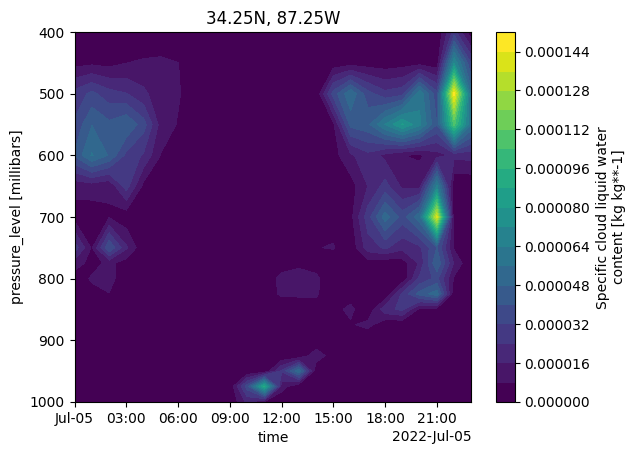

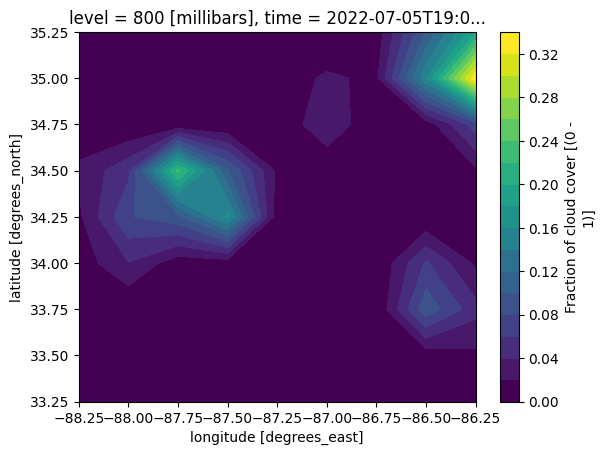

In [2]:
import xarray as xr
import matplotlib.pyplot as pl
data=xr.open_dataset('SEUS050722.nc')

pl.figure()
data.clwc.sel(longitude=-87.25,latitude=34.25,method='nearest').plot.contourf(x='time',y='level',levels=20,cmap='viridis')
pl.title('34.25N, 87.25W')
pl.gca().invert_yaxis()
pl.figure()
data.cc.sel(time='2022-07-05T19:00:00',level=800).plot.contourf(x='longitude',y='latitude',levels=20,cmap='viridis')

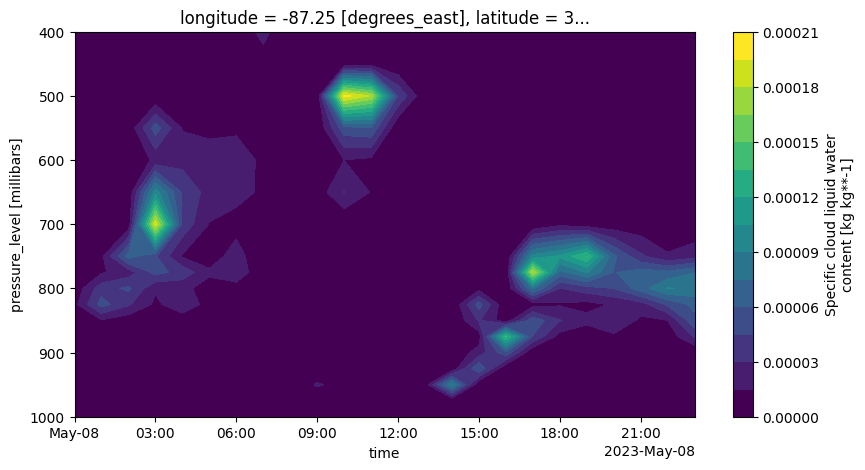

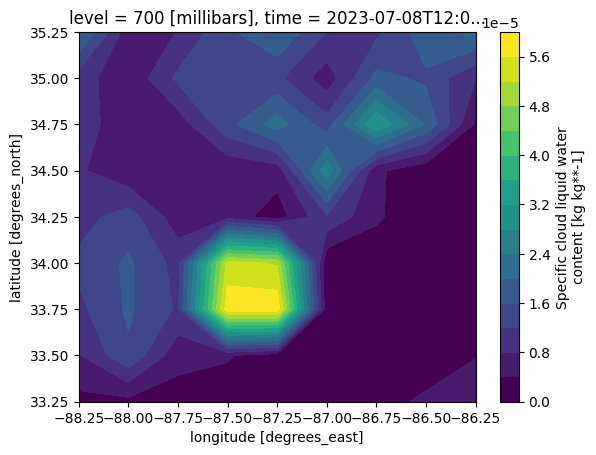

In [10]:
import xarray as xr
import matplotlib.pyplot as pl
data=xr.open_dataset('SEUS_2023_cloud_content.nc')
pl.figure(figsize=(10,5))
data.clwc.sel(longitude=-87.25,latitude=33.75,time=slice('2023-05-08','2023-05-08')).plot.contourf(x='time',y='level',levels=20,cmap='viridis')
pl.gca().invert_yaxis()
pl.figure()
data.clwc.sel(time='2023-07-08T12:00:00',level=700).plot.contourf(x='longitude',y='latitude',levels=20,cmap='viridis')

In [7]:
data

<xarray.Dataset>
Dimensions:    (longitude: 9, latitude: 9, level: 18, time: 24)
Coordinates:
  * longitude  (longitude) float32 -88.25 -88.0 -87.75 ... -86.75 -86.5 -86.25
  * latitude   (latitude) float32 35.25 35.0 34.75 34.5 ... 33.75 33.5 33.25
  * level      (level) int32 400 450 500 550 600 650 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2022-07-05 ... 2022-07-05T23:00:00
Data variables:
    cc         (time, level, latitude, longitude) float32 ...
    clwc       (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-08 01:52:05 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...